<a href="https://colab.research.google.com/github/ngoantnut/Loan-Eligibility-ML/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Đọc dữ liệu đầu vào

In [18]:
dt_1 = pd.read_csv('train.csv')
print("5 hàng đầu tiên: ")
print(dt_1.head())
print("")
print("Thống kê các tính năng cơ bản: ")
print(dt_1.describe())
print("")
print("Thông tin các cột:")
print(dt_1.info())

5 hàng đầu tiên: 
   Id   kind  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   1  white            8.7              0.34         0.46            13.8   
1   2  white            5.6              0.26         0.00            10.2   
2   3  white            7.9              0.25         0.29             5.3   
3   4  white            6.7              0.24         0.33            12.3   
4   5  white            7.0              0.27         0.74             1.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.055                 68.0                 198.0  0.99880  3.36   
1      0.038                 13.0                 111.0  0.99315  3.44   
2      0.031                 33.0                 117.0  0.99180  3.06   
3      0.046                 31.0                 145.0  0.99830  3.36   
4      0.173                 34.0                 121.0  0.99334  3.04   

   sulphates  alcohol  quality  
0       0.37      9.5        6  
1 

Ở đây ta thấy không có các giá trị khuyết thiếu

Ở phần 'Kind' ta thấy dữ liệu có 2 loại rượu: vang trắng và vang đỏ. Vì đặc tính của 2 loại này có chút khác biệt nên ta sẽ chia nó ra

In [19]:
dt_white = dt_1[dt_1['kind']=='white']
dt_red = dt_1[dt_1['kind']=='red']

Lược đồ hist của cả 2 loại

White wine histogram


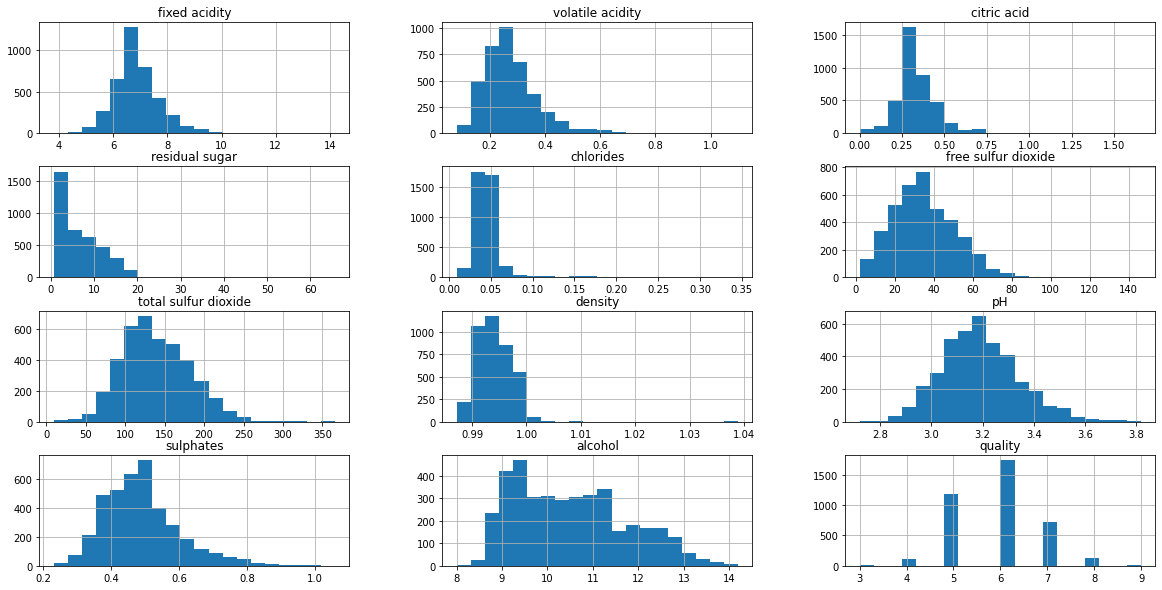

 
Red wine histogram


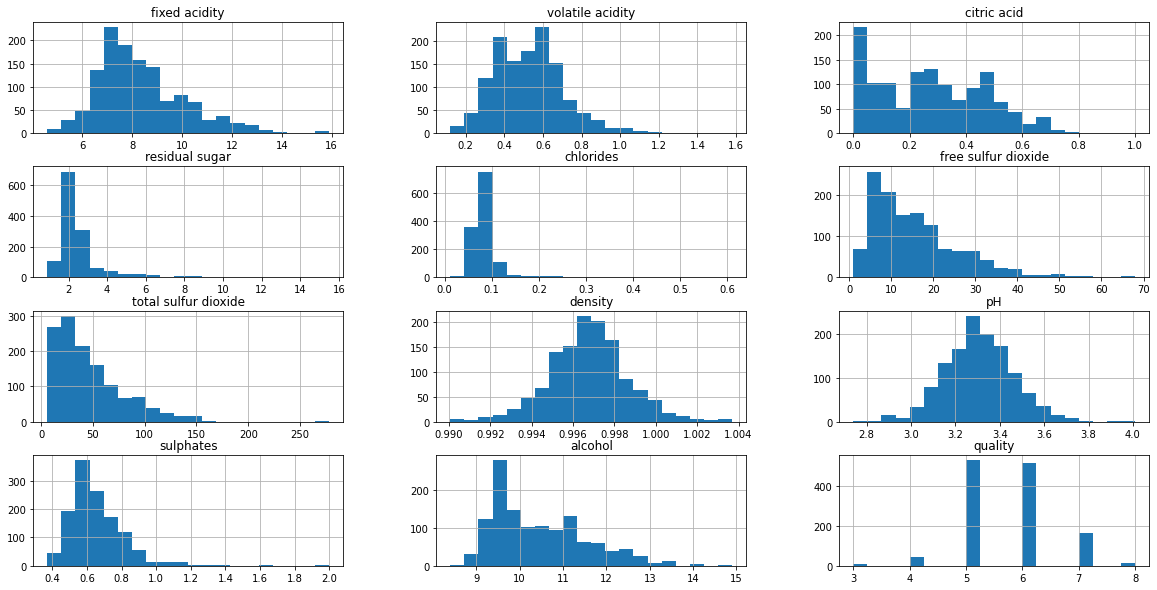

In [20]:
def Hist_p(dataset):
    dataset.iloc[:, 1:].hist(bins=20, figsize=(20, 10))
    plt.show()
    
print('White wine histogram')    
Hist_p(dt_white)
print(' ')    
print('Red wine histogram')    
Hist_p(dt_red)

Bản đồ tương quan của rượu vang trắng: 


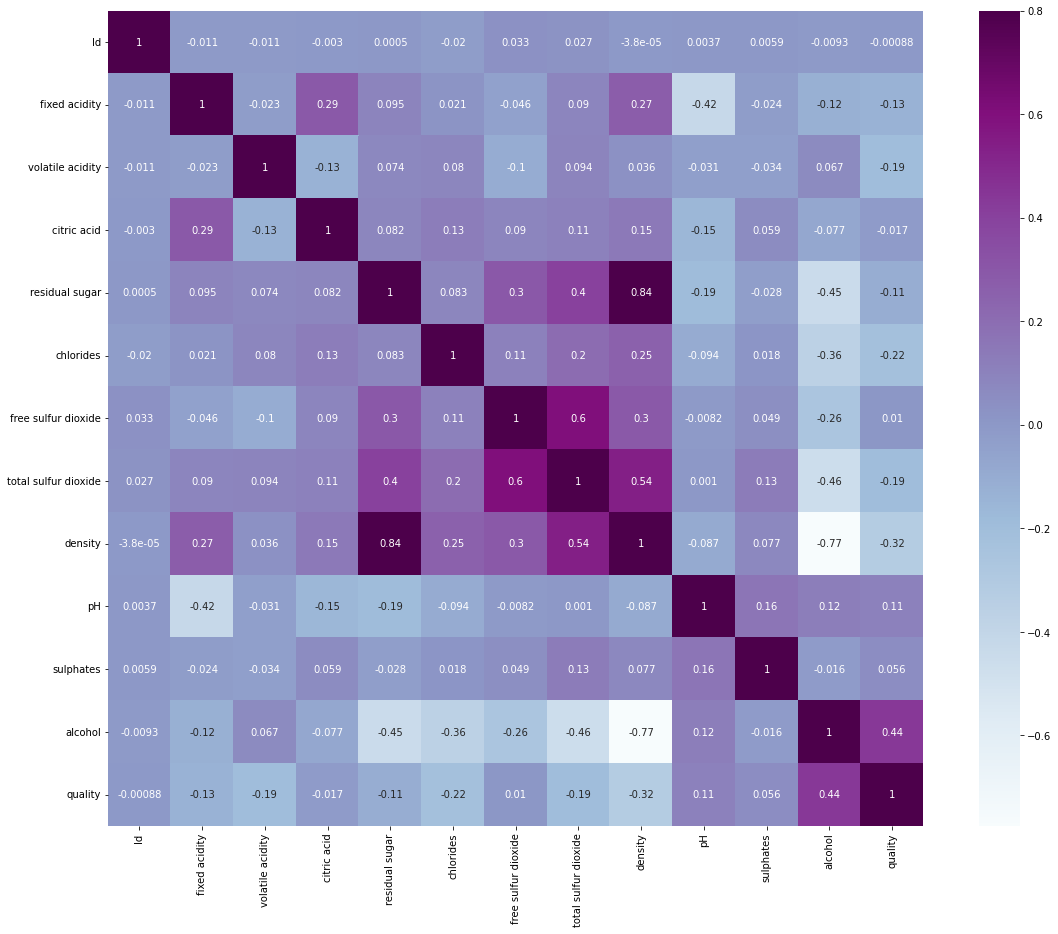

In [21]:
import seaborn as sns
print('Bản đồ tương quan của rượu vang trắng: ') 
corr_white = dt_white.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr_white,vmax=.8,square=True,cmap="BuPu", annot = True)

Bản đồ tương quan của rượu vang đỏ: 


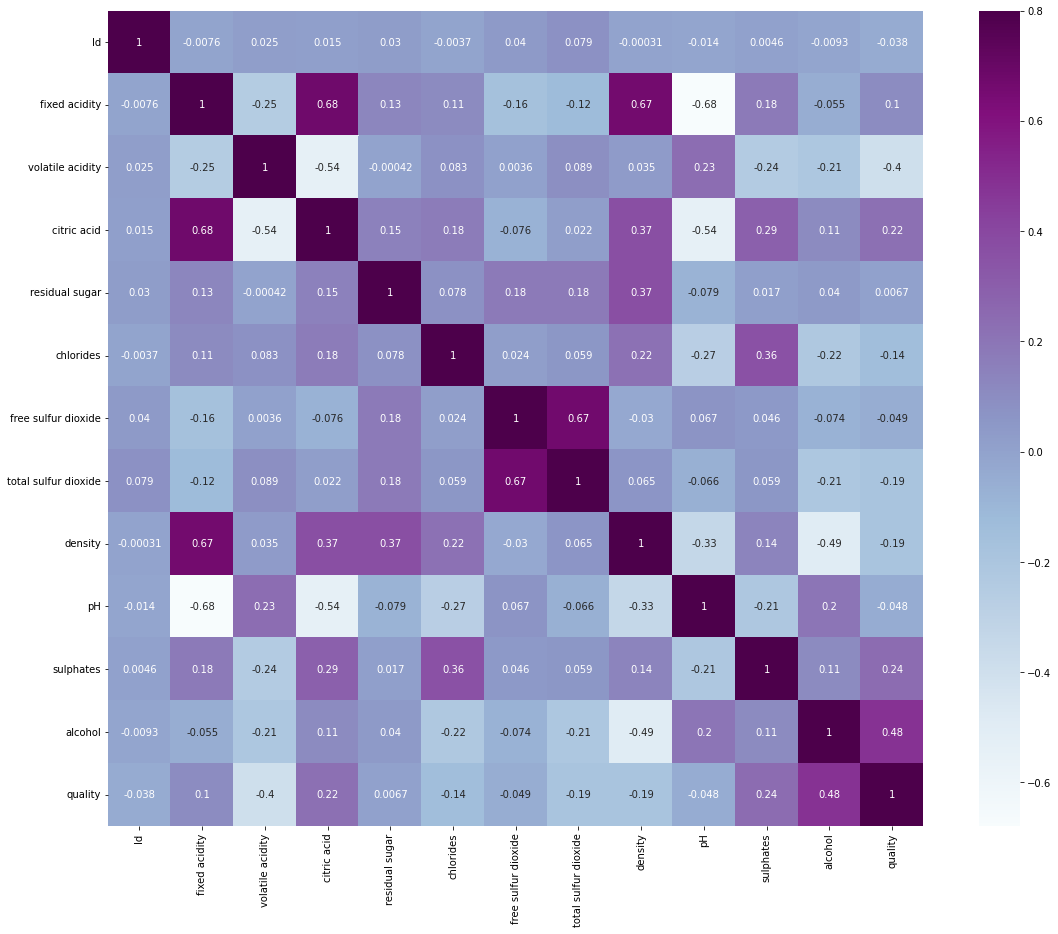

In [22]:
print('Bản đồ tương quan của rượu vang đỏ: ') 
corr_red = dt_red.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr_red,vmax=.8,square=True,cmap="BuPu", annot = True)

Nhận xét: Ta thấy alcohol ảnh hưởng tới chất lượng rượu nhiều nhất. 

Ở vang đỏ có thêm ảnh hưởng của sulphates nhưng khá yếu

Training:

In [23]:
White_X = dt_white.iloc[:, 2:13]
White_y = dt_white.iloc[:, 13]

Red_X = dt_red.iloc[:, 2:13]
Red_y = dt_red.iloc[:, 13]

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def Dtree(X, y, label):
    clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
    scores = cross_val_score(clf, X, y, cv=5)
    print(label)
    print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

def Rfrst(X, y, label):    
    clrf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    scores = cross_val_score(clrf, X, y, cv=5)
    print(label)
    print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [25]:
Dtree(White_X, White_y, "White wine")
Rfrst(White_X, White_y, "White wine")

White wine
Decision Tree Accuracy: 0.58 (+/- 0.04)
White wine
Random Forest Accuracy: 0.64 (+/- 0.02)


In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 36, 63, 90, 116, 143, 170, 196, 223, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [27]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model

def RANDOM_T(X, y):
    rf_random.fit(X, y)
    

In [28]:
RANDOM_T(White_X, White_y)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 116}

In [29]:
clrf_grid = RandomForestClassifier(n_estimators=63, min_samples_split=5, min_samples_leaf= 2, max_features= 'auto', max_depth=70, random_state=0, bootstrap= False)
scores = cross_val_score(clrf_grid, White_X, White_y, cv=5)
print("White wine Grid Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

White wine Grid Random Forest Accuracy: 0.66 (+/- 0.01)


In [30]:
RANDOM_T(Red_X, Red_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [31]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 36}

In [32]:
clrf_grid = RandomForestClassifier(n_estimators=250, min_samples_split=5, min_samples_leaf= 1, max_features= 'sqrt', max_depth=100, random_state=0, bootstrap= True)
scores = cross_val_score(clrf_grid, Red_X, Red_y, cv=5)
print("Red wine Grid Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#Default score for Random Forest: Mean accuracy of self.predict(X) wrt. y. 

Red wine Grid Random Forest Accuracy: 0.67 (+/- 0.03)


In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [34]:
xgb = XGBClassifier()
#kfold = KFold(n_splits=5, random_state=7)
def XGBs(X, y, label):
    results = cross_val_score(xgb, X, y, cv=5)
    print(label)
    print("XGBoost Accuracy: %.2f (+/- %.2f)" % (results.mean(), results.std()* 2))

In [35]:
XGBs(White_X, White_y, "White wine")
XGBs(Red_X, Red_y, "Red wine")

White wine
XGBoost Accuracy: 0.58 (+/- 0.04)
Red wine
XGBoost Accuracy: 0.64 (+/- 0.06)


In [42]:
dt_test = pd.read_csv('test1.csv')
print("Print first 5 subjects")
print(dt_test.head())

Print first 5 subjects
     Id   kind  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  5201  white            6.9             0.190         0.28             5.0   
1  5238  white            6.7             0.410         0.24             5.4   
2  5239  white            6.8             0.230         0.48             1.5   
3  5240  white            5.8             0.415         0.13             1.4   
4  6495  white            7.9             0.350         0.36             1.6   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.058                   14                   146  0.99520  3.29   
1      0.035                   33                   115  0.99010  3.12   
2      0.036                   35                   165  0.99162  3.18   
3      0.040                   11                    64  0.99220  3.29   
4      0.038                   11                   124  0.99280  3.25   

   sulphates    alcohol  
0       0.36   9.100000  

In [43]:
dtt_white = dt_test[dt_test['kind']=='white']
dtt_red = dt_test[dt_test['kind']=='red']

In [44]:
dtt_white_X=dtt_white.iloc[:, 2:13]
#dtt_white_X.head()
dtt_red_X=dtt_red.iloc[:, 2:13]

In [45]:
clrf_gridw = RandomForestClassifier(n_estimators=63, min_samples_split=5, min_samples_leaf= 2, max_features= 'auto', max_depth=70, random_state=0, bootstrap= False)
clrf_gridw.fit(White_X, White_y)
result_white = clrf_gridw.predict(dtt_white_X)

#for red
clrf_gridr = RandomForestClassifier(n_estimators=250, min_samples_split=5, min_samples_leaf= 1, max_features= 'sqrt', max_depth=100, random_state=0, bootstrap= True)
clrf_gridr.fit(Red_X, Red_y)
result_red = clrf_gridw.predict(dtt_red_X)

In [46]:
White_submitt=pd.DataFrame({"Id": dtt_white['Id'], "quality": result_white})
Red_submitt=pd.DataFrame({"Id": dtt_red['Id'], "quality": result_red})

In [47]:
SJ_submit = pd.concat([White_submitt, Red_submitt]).sort_index()
SJ_submit
pd.DataFrame(SJ_submit).to_csv("submit_SJ.csv", index=False)